In [2]:
from __future__ import print_function
import keras, pickle
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K

Using TensorFlow backend.


In [7]:
infile = open('../data/data8.pickle','rb')
new_dict = pickle.load(infile)
y_train = new_dict['y_train']
y_test = new_dict['y_test']
x_train = new_dict['x_train'][:,0,:,:]
x_test = new_dict['x_test'][:,0,:,:]
y_train

array([37, 27, 38, ..., 11, 14, 30])

In [8]:
batch_size = 100
epochs = 8
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]
num_chanels = 1
num_classes = len(set(y_train))

In [9]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print(f"We have data prepared for backend [{keras.backend.backend()}]")
print(input_shape)

We have data prepared for backend [tensorflow]
(32, 32, 1)


In [10]:
from keras.utils import to_categorical

# Convert class vectors to binary class matrices, like get_dummies on pandas
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(input_shape)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
loss_function = keras.losses.categorical_crossentropy
optimizer = keras.optimizers.Adadelta()
model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 86989 samples, validate on 12630 samples
Epoch 1/8
86989/86989 [==============================] - 151s 2ms/step - loss: 0.6667 - accuracy: 0.8171 - val_loss: 0.2022 - val_accuracy: 0.9461
Epoch 2/8
86989/86989 [==============================] - 156s 2ms/step - loss: 0.1470 - accuracy: 0.9581 - val_loss: 0.1625 - val_accuracy: 0.9594
Epoch 3/8
86989/86989 [==============================] - 163s 2ms/step - loss: 0.0902 - accuracy: 0.9738 - val_loss: 0.1391 - val_accuracy: 0.9672
Epoch 4/8
86989/86989 [==============================] - 159s 2ms/step - loss: 0.0620 - accuracy: 0.9819 - val_loss: 0.1367 - val_accuracy: 0.9691
Epoch 5/8
86989/86989 [==============================] - 160s 2ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.1649 - val_accuracy: 0.9646
Epoch 6/8
86989/86989 [==============================] - 162s 2ms/step - loss: 0.0376 - accuracy: 0.9882 - val_loss: 0.1454 - val_accuracy: 0.9678
Epoch 7/8
86989/86989 [==============================] - 186s 2ms/st

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1437651354237713
Test accuracy: 0.9706255197525024


In [15]:
history.history

{'val_loss': [0.20216858613519373,
  0.16246060717051594,
  0.13907742429515813,
  0.13673343928862638,
  0.16486537913693763,
  0.14536276429903386,
  0.14388252628313838,
  0.14376513346121222],
 'val_accuracy': [0.94608074426651,
  0.9593824148178101,
  0.9672209024429321,
  0.9691211581230164,
  0.9646080732345581,
  0.9677751660346985,
  0.969437837600708,
  0.9706255197525024],
 'loss': [0.6667043606237979,
  0.14701826672295168,
  0.09020154582997911,
  0.061954089329307016,
  0.04897686678938785,
  0.03759652010723773,
  0.03118512901688064,
  0.026894042443346953],
 'accuracy': [0.8170918,
  0.95807517,
  0.97381276,
  0.98188275,
  0.9851131,
  0.9882399,
  0.9905735,
  0.9919645]}

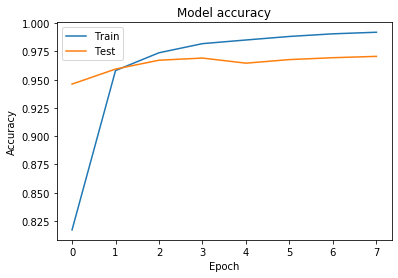

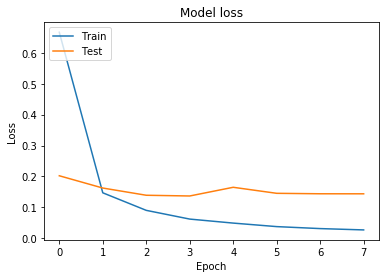

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

[2.76761248e-25 4.04804089e-27 1.09549286e-25 2.21431085e-22
 1.74536222e-28 3.27402026e-25 3.32165754e-27 6.81089600e-34
 2.30070375e-35 4.27270190e-25 1.39000494e-23 2.80753140e-17
 1.53743271e-24 3.37228697e-23 7.37867208e-20 5.11314178e-28
 5.48119674e-32 1.97411677e-25 1.66555993e-17 6.35909848e-25
 7.15107227e-15 9.45520114e-26 7.94118402e-17 1.70225560e-18
 1.71633877e-19 1.00000000e+00 5.49249664e-18 5.58089098e-16
 2.80732672e-18 8.48513270e-18 2.15578223e-16 1.23997054e-23
 1.45752566e-21 8.22784890e-23 7.55641102e-22 2.64817463e-20
 5.06389993e-19 1.39552366e-25 6.22234991e-23 6.55869367e-21
 6.38072115e-26 8.12070376e-24 2.97913074e-25]
25


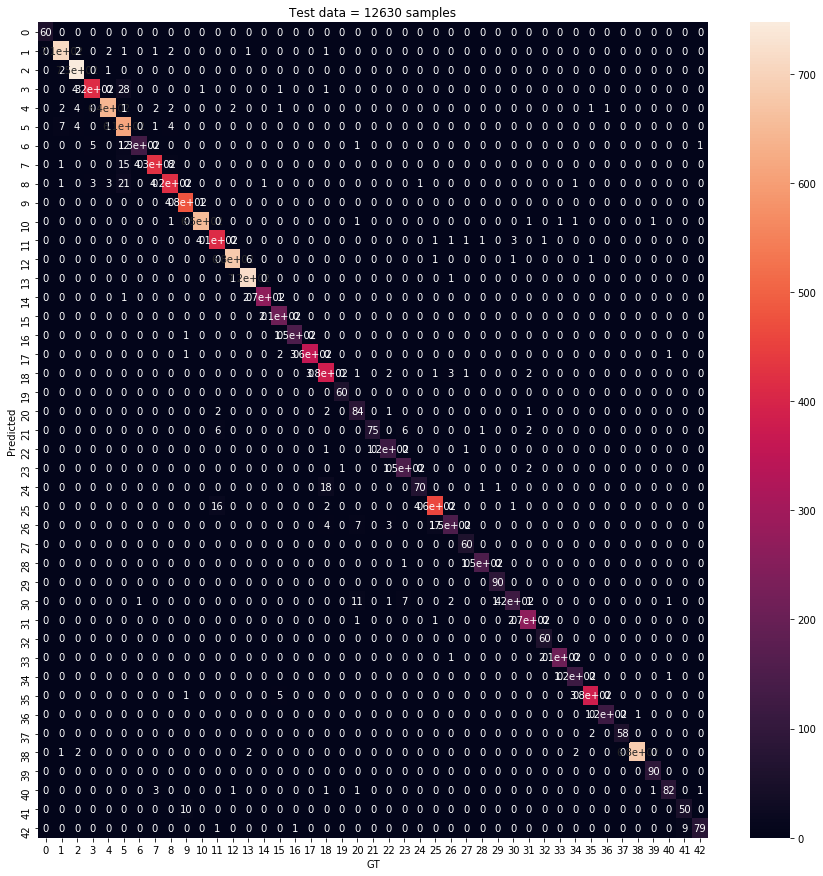

In [17]:
# Plot confusion matrix to have a more detailed view of cross-class missclassifications
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure

## Use argmax to project output probabilites as class index label
proba = model.predict(x_test)
print(proba[0])
y_pred = np.argmax(proba, axis=1)
print(y_pred[0])
y_t = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_t, y_pred)

figure(figsize=(15,15))
sns.heatmap(cm, annot=True)
plt.xlabel("GT")
plt.ylabel("Predicted")
plt.title(f"Test data = {len(y_pred)} samples")
plt.show()

In [19]:
model.save("../data/model/model_train.h5")
#model.save_weights('../data/model/model_trained_weights.h5')
